In [1]:
import yfinance as yf
from yahooquery import Ticker
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pprint
from dateutil.relativedelta import relativedelta

In [ ]:
ticker='COST'
tick = Ticker(ticker)
# tick.all_financial_data().keys()
tick.all_financial_data()[[x for x in tick.all_financial_data().keys() if 'EPS' in x]]

In [42]:
[x for x in tick.all_financial_data().keys() if 'Price' in x]

[]

In [22]:
start = 18000
start_time = pd.to_datetime('2/28/2023')
df = pd.DataFrame(data={'invested':[0], 'cash': [start]}, index=[start_time])
def dca(df, invest_amount, cycle_weeks, add, num_cycles):
    if num_cycles == 0:
        print(df)
        return True
    date = df.index.max() + relativedelta(weeks = cycle_weeks)
    invested = df.loc[df.index.max(), 'invested'] + invest_amount
    cash = df.loc[df.index.max(), 'cash'] - invest_amount + add
    df = pd.concat([df, pd.DataFrame({'invested': [invested], 'cash': [cash]}, index=[date])])
    num_cycles += -1
    dca(df, invest_amount, cycle_weeks, add, num_cycles)

dca(df=df, invest_amount=500, cycle_weeks=1, add=250, num_cycles=48)

            invested   cash
2023-02-28         0  18000
2023-03-07       500  17750
2023-03-14      1000  17500
2023-03-21      1500  17250
2023-03-28      2000  17000
2023-04-04      2500  16750
2023-04-11      3000  16500
2023-04-18      3500  16250
2023-04-25      4000  16000
2023-05-02      4500  15750
2023-05-09      5000  15500
2023-05-16      5500  15250
2023-05-23      6000  15000
2023-05-30      6500  14750
2023-06-06      7000  14500
2023-06-13      7500  14250
2023-06-20      8000  14000
2023-06-27      8500  13750
2023-07-04      9000  13500
2023-07-11      9500  13250
2023-07-18     10000  13000
2023-07-25     10500  12750
2023-08-01     11000  12500
2023-08-08     11500  12250
2023-08-15     12000  12000
2023-08-22     12500  11750
2023-08-29     13000  11500
2023-09-05     13500  11250
2023-09-12     14000  11000
2023-09-19     14500  10750
2023-09-26     15000  10500
2023-10-03     15500  10250
2023-10-10     16000  10000
2023-10-17     16500   9750
2023-10-24     17000

In [46]:
ticker='COST'
ticker_info =yf.Ticker(ticker)
ticker_info.get_earnings()

Exception: yfinance failed to decrypt Yahoo data response

In [43]:
ticker='COST'
corporate_bond_yield = 4.4
PE_ratio_border = 100/ corporate_bond_yield

def calculate_graham_raws(ticker):
    calculated = {}
    ticker_info = yf.Ticker(ticker)
    shares = ticker_info.fast_info['shares']
    book_value = ticker_info.balance_sheet.loc['Total Assets'] - ticker_info.balance_sheet.loc['Total Liabilities Net Minority Interest']
    calculated['EPS'] = ticker_info.get_earnings()['Earnings']/shares
    calculated['BVPS'] = book_value/shares
    calculated['PB'] =  ticker_info.fast_info['lastPrice']/BVPS
    calculated['PE'] = ticker_info.fast_info['lastPrice']/ EPS
    calculated['Price'] = ticker_info.fast_info['lastPrice']
    return calculated

def graham_ratio(ticker):
    calculated = calculate_graham_raws(ticker)
    if calculated['EPS'].median() <= 0:
        print('negative earnings for company')
        return 0
    calculated['graham_value_adjusted'] = np.sqrt(PE_ratio_border * 1.5 * calculated['EPS'].median() * calculated['BVPS'].median())
    return calculated

graham_value = graham_ratio(ticker=ticker)

Exception: yfinance failed to decrypt Yahoo data response

In [ ]:
ticker_info = yf.Ticker(ticker)
shares = ticker_info.fast_info['shares']
ticker_info.balance_sheet.loc['Total Assets']

# - ticker_info.balance_sheet.loc['Total Liabilities Net Minority Interest']
    

In [ ]:
ticker_info.balance_sheet

In [ ]:
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(graham_value)

In [17]:
period = '5y'
tickers = ['VLUE', 'VOO']
tickers = [x.upper() for x in tickers]

def get_history(tickers, period):
    data = {}
    for x in tickers:
        data[x] = yf.Ticker(x).history(period=period)
    return data

data = get_history(tickers, period) 

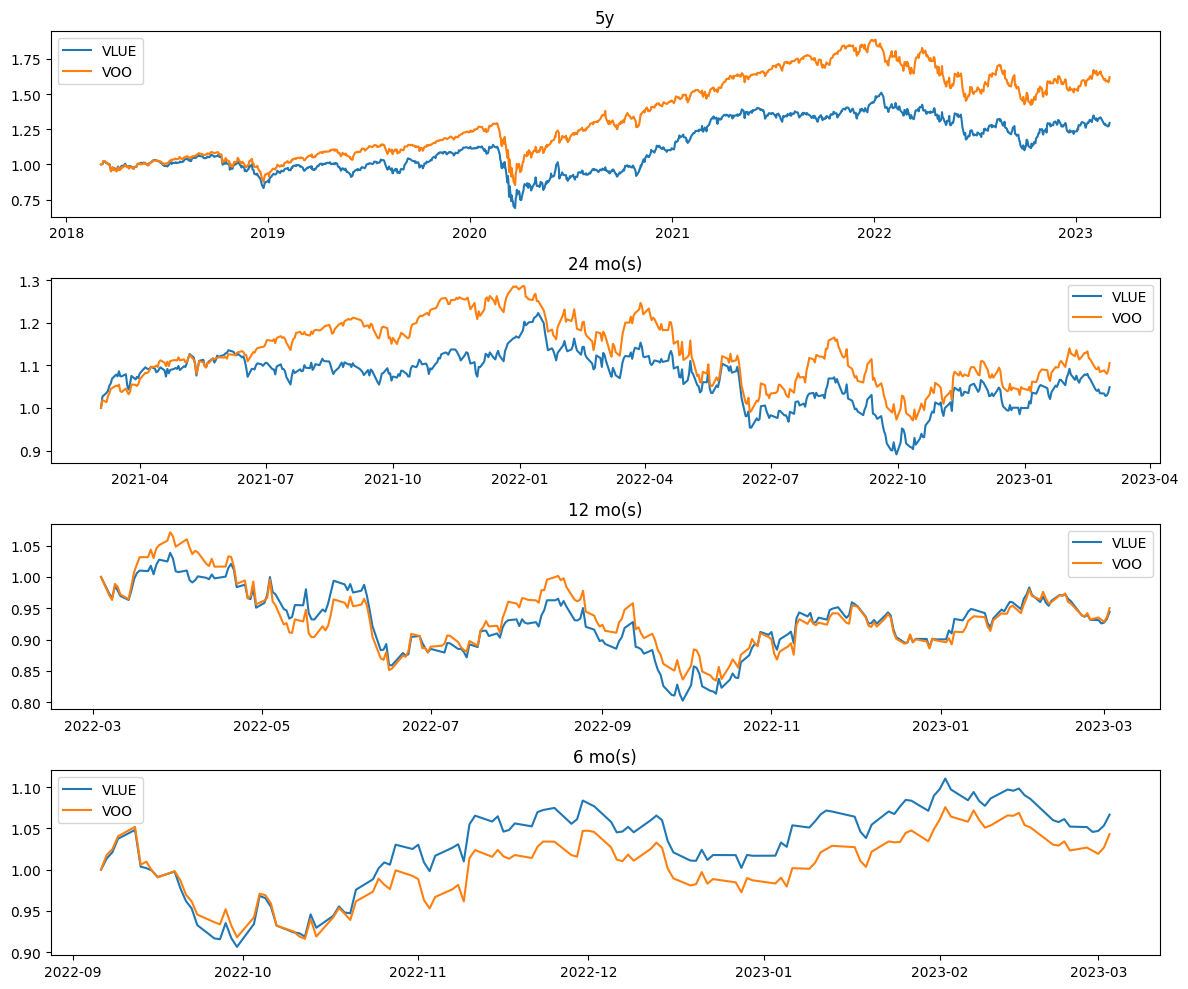

In [18]:
period_views = ['24', '12', '6'] # in months
plt.figure(figsize=(12, 10))
for x in tickers:
    plt.subplot(4,1,1)
    plt.plot(data[x]['Close']/ data[x]['Close'][0], label=x)
    plt.title(period)
    for idx, y in enumerate(period_views):
        plt.subplot(4,1,2+idx)
        now_point = data[x].index[-1]
        start = now_point- relativedelta(months = int(y))
        mask = data[x].index>start
        plt.plot(data[x].loc[mask, 'Close']/ data[x].loc[mask, 'Close'][0], label=x)
        plt.title(f'{y} mo(s)')
    
for x in range(1, 5):
    plt.subplot(4, 1, x)
    plt.legend()
plt.tight_layout()
plt.show()
